# 15-plots in plotly

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Import dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 1. Scatter Plot

In [5]:
fig1 = px.scatter(df, x='sepal_length', y='sepal_width', color="species")
fig1.show()
# save the plot
fig1.write_image('./output/fig1.png', scale=3)

## 2. Line PLot

In [6]:
fig2 = px.line(df, x='sepal_length', y='sepal_width', color="species")
fig2.show()

> As we can see above,that the line chat is not so good because of mix of lines,so for good line chat,we need to make sure that the lines are not mixed up.By apply sort we can do it below as:

In [7]:
# sort the data
df_line = df.sort_values(by=['sepal_length'])
fig2 = px.line(df_line, x='sepal_length', y='sepal_width', color="species")
fig2.show()
# save the plot
fig2.write_image('./output/fig2.png', scale=3)

## 3. Bar Plot

In [8]:
fig3 = px.bar(df, x='species', y='sepal_width')
fig3.show()

> See above, that this is not also a good bar plot because of having no mean.So we can also set this by groupby values based on mean. 

In [9]:
# groupby values based on mean
df_bar = df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [10]:
fig3 = px.bar(df_bar, x='species', y='sepal_width')
fig3.show()
# save the plot
fig3.write_image("./output/fig3.png", scale=3)

> Seaborn does not need to make mean group as: But plotly does need

<Axes: xlabel='species', ylabel='sepal_width'>

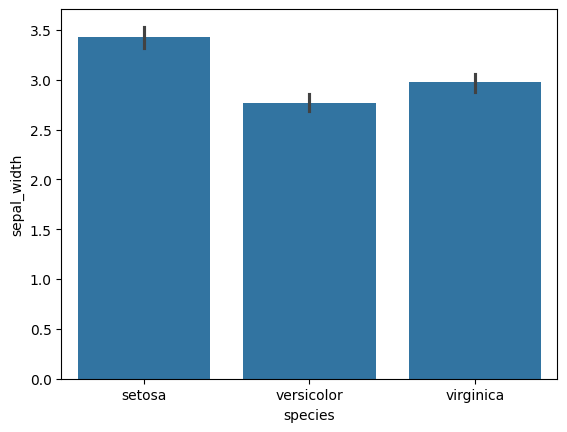

In [11]:
sns.barplot(df, x='species', y='sepal_width')

## 4. Box Plot

In [12]:
fig4 = px.box(df, x='species', y='sepal_width', color='species')
fig4.show()
# save the plot
fig4.write_image('./output/fig4.png', scale=3)

## 5. Violin plot

In [13]:
fig5 = px.violin(df, x='species', y='sepal_width', color='species', box=True)
fig5.show()
# save the plot
fig5.write_image('./output/fig5.png', scale=3)

## 6. Histogram

In [14]:
fig6 = px.histogram(df, x='sepal_width', color='species')
fig6.show()
# save the plot
fig6.write_image('./output/fig6.png', scale=3)

## 7. Pie Chart

In [15]:
fig7 = px.pie(df, values='sepal_width', names='species')
fig7.show()

> The best way for Pie Chart is as:

In [16]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

> As we can see that species have 50 % of the total number of species in the first 10 species. So, we can conclude that as:

In [17]:
df_pie = df['species'].value_counts().reset_index()
df_pie.columns = ['species', 'count']
fig7 = px.pie(df_pie, values='count', names='species')
fig7.show()
# save the plot
fig7.write_image('./output/fig7.png', scale=3)

## 8. Scatter 3D Plot

In [18]:
fig8 = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig8.show()
# save the plot in html file
fig8.write_html('./output/fig8.html')

## 9. Area Chart

In [19]:
fig9 = px.area(df, x='sepal_width', y='sepal_length', color='species')
fig9.show()

> Set that as:

In [20]:
df_area = df.sort_values(by=['sepal_length'])
fig9 = px.area(df_area, x='sepal_width', y='sepal_length', color='species')
fig9.show()
# save the plot
fig9.write_image('./output/fig9.png', scale=3)

## 10. Bubble Chart

>In Bubble Chart, size is compulsory as shown in code:

In [21]:
fig10 = px.scatter(df, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig10.show()
# save the plot
fig10.write_image('./output/fig10.png', scale=3)

## 11. Sunburst Chart

In [22]:
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='counts')
fig11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')
fig11.show()
# save the plot 
fig11.write_image('./output/fig11.png', scale=3)
# save the plot in html file
fig11.write_html('./output/fig11.html')

## 12. Parallel Coordinate Plot

In [23]:
# Add a numeric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes
# Parallel Coordinates Plot
fig12 =px.parallel_coordinates(df, color='species_id', labels={'species_id': 'Species'}, color_continuous_scale=px.colors.sequential.Plasma)
fig12.show()
# save the plot
fig12.write_image('./output/fig12.png', scale=3)
# save the plot in html file
fig12.write_html('./output/fig12.html')

## 13. Density Contour PLot

In [24]:
fig13 = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig13.show()
# save the plot
fig13.write_image('./output/fig13.png', scale=3)

## 14. Ternary Plot

In [25]:
fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()
# save the plot
fig14.write_image('./output/fig14.png', scale=3)

## 15. Polar Chart(Polar Coordinate Chart or Radar Chart)

In [26]:
fig15 = px.line_polar(df, r='sepal_length', theta='species', line_close=True)
fig15.show()

> Set that

In [27]:
df_radar = df.groupby(['species']).mean().reset_index()
fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()
# save the plot
fig15.write_image('./output/fig15.png', scale=3)